In [13]:
import numpy as np
import torch, torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Prerequisites:

- pip/conda install torch, torchvision

# Neural Networks using PyTorch framework
---
![](resources/torch.png)
## Comparing performance of classical networks to convolutional neural networks 

## Typical Deep Learning workflow:

1. Load your training datasets, and(if needed) convert them into PyTorch datasets
2. Build PyTorch-DataLoaders using your datasets, set shuffle = True and define batch size
3. Define the neural network structure
4. Training process:
    - Define optimizer
    - Define loss function
    - Define # of training iterations
    - Train your model
5. Evaluation process:
    - Use your model to predict labels for your test set
    - evaluate accuracy with true labels

# Part I: Pair programming

## Get the training data

In [14]:
# Get the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

training_data = torchvision.datasets.MNIST('data/', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST('data/', train=False, download=True, transform=transform)

In [15]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [16]:
testing_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

## Look at the data more closely

In [25]:
# Look at a particular point

test_img = training_data.data[0]
test_label = training_data.targets[0]

# 1. plot it
# 2. show it's format



Label: 5


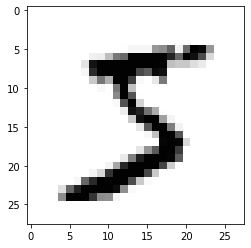

In [23]:
plt.imshow(test_img, cmap='Greys')
print(f'Label: {test_label}')

In [34]:
np.unique(train_loader.dataset.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Create dataloaders to feed data into our neural network

In [27]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=16, shuffle=True)

# Define the network

In [43]:
# Define Neural Network

class Neural_Network(torch.nn.Module):
    
    def __init__(self, input_dim, num_classes):
        
        super(Neural_Network, self).__init__()
        
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.layer1 = torch.nn.Linear(self.input_dim, 50)
        self.layer2 = torch.nn.Linear(50, 100)
        self.layer3 = torch.nn.Linear(100, self.num_classes)
        
    def forward(self, x):
        
        # Passing the first layer
        x = self.layer1(x.view(-1, self.input_dim))
        x = F.sigmoid(x)
        
        # Passing the second layer
        x = self.layer2(x)
        x = F.sigmoid(x)
        
        # Passing the third layer
        x = self.layer3(x)
        
        return x    

## Training loop

In [44]:
# 1. Create an object of the neural network
# 2. Define an optimizer
# 3. Define a loss function

network = Neural_Network(784, 10)
optimizer = torch.optim.SGD(params = network.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [45]:
# Run the training loop

num_iterations = 10

for epoch in range(num_iterations):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):
        
        x, y = data
        
        # zero-out gradients
        optimizer.zero_grad()
        
        # forward pass
        prediction = network.forward(x)
        
        # compute loss
        loss = loss_fn(prediction, y)
        
        running_loss += loss.item()
        
        # backpropagation
        loss.backward()
        
        optimizer.step()
        
    print(f'Error after epoch: {epoch} =  {running_loss / len(train_loader)}')
    

/home/dg/envs/ds/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Error after epoch: 0 =  2.299909678395589
Error after epoch: 1 =  2.291334367752075
Error after epoch: 2 =  2.2817932456334433
Error after epoch: 3 =  2.2682059002558392
Error after epoch: 4 =  2.247385698699951
Error after epoch: 5 =  2.2152431074142456
Error after epoch: 6 =  2.1657517914454143
Error after epoch: 7 =  2.0920716283162433
Error after epoch: 8 =  1.9916838428815207
Error after epoch: 9 =  1.8689387754440308


# Evaluation loop

In [64]:
# evaluation loop
correct = 0
total = 0

with torch.no_grad():
    
    for i, data in enumerate(test_loader):
        
        x, y = data
        
        predicted = network.forward(x)
        
        _, predicted = torch.max(predicted.data, 1)
        
        correct += (predicted == y).sum().item()
        
        total += y.size(0)

print(f'Final accuracy: {correct / total*100}% ')

/home/dg/envs/ds/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Final accuracy: 51.73% 


## Compare regular Multilayer-perceptron performance against Convolutional neural network

### How to compute output size after convolutional layer ??:
- If stride = 1, padding = 0, dilation = 1 
- output shape width(height): (size(input.shape[0]) - kernel.shape[0]) + 1
- same for output shape 1

- Nice visualizations of different kernel/filter/convolution strategies: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

### How to compute output size after pooling layer ??:
- If stride = 1, padding = 0, dilation = 1 
- output shape widht: input width / kernel width
- same for output height

- Nice visualizations of different kernel/filter/convolution strategies: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

In [68]:
# Define a convolutional neural network

# Define Neural Network
class Conv_Net(torch.nn.Module):
    
    def __init__(self, input_dim, num_classes):
        
        super(Conv_Net, self).__init__()
        
        self.input_dim = input_dim
        
        self.num_classes = num_classes
        
        
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        
        self.conv2 = torch.nn.Conv2d(6, 16, 5)
        
        self.pool = torch.nn.MaxPool2d(2)
        
        
        self.layer1 = torch.nn.Linear(16 * 4 * 4 , 50)
        self.layer2 = torch.nn.Linear(50, 100)
        self.layer3 = torch.nn.Linear(100, self.num_classes)
        
    def forward(self, x):
        
        # Input shape: 28 x 28 x 6
        x = self.conv1(x)
        x = F.relu(x)
        
        # Input 24 x 24 x 6
        x = self.pool(x)
        
        # Input 12 x 12 x 6
        x = self.conv2(x)
        x = F.relu(x)
        
        # Input 8 x 8 x 16
        x = self.pool(x)
        
        # Input 4 x 4 x 16
        x = self.layer1(x.view(-1, 4 * 4 * 16))
        x = F.relu(x)
        
        # Passing the second layer
        x = self.layer2(x)
        x = F.relu(x)
        
        # Passing the third layer
        x = self.layer3(x)
        
        return x    

In [77]:
# 1. Create an object of the neural network
# 2. Define optimizer
# 3. Define a loss function

network = Conv_Net(784, 10)
optimizer = torch.optim.SGD(params=network.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()

In [78]:
# training loop:
# Run the training loop

num_iterations = 10

for epoch in range(num_iterations):
    
    running_loss = 0.0
    
    for i, data in enumerate(train_loader):
        
        x, y = data
        
        # zero-out gradients
        optimizer.zero_grad()
        
        # forward pass
        prediction = network.forward(x)
        
        # compute loss
        loss = loss_fn(prediction, y)
        
        running_loss += loss.item()
        
        # backpropagation
        loss.backward()
        
        optimizer.step()
        
    print(f'Error after epoch: {epoch} =  {running_loss / len(train_loader)}')
    

Error after epoch: 0 =  0.6199655671540648
Error after epoch: 1 =  0.10519977164162944
Error after epoch: 2 =  0.07564659943189472
Error after epoch: 3 =  0.059900401427080696
Error after epoch: 4 =  0.05068628455610402
Error after epoch: 5 =  0.04351682007452279
Error after epoch: 6 =  0.0382263720872715
Error after epoch: 7 =  0.03451183774853222
Error after epoch: 8 =  0.030847848465439164
Error after epoch: 9 =  0.02746898688941486


# Evaluation loop

In [79]:
# evaluation loop
correct = 0
total = 0

with torch.no_grad():
    
    for i, data in enumerate(test_loader):
        
        x, y = data
        
        predicted = network.forward(x)
        
        _, predicted = torch.max(predicted.data, 1)
        
        correct += (predicted == y).sum().item()
        
        total += y.size(0)

print(f'Final accuracy: {correct / total*100}% ')

Final accuracy: 98.78% 


# Part II: Build your own Neural Network classifiers:

### Todos:
1. Load the CIFAR 10 train and test dataset from the torchvision library that we have used above for the MNIST data:
Documentation: https://pytorch.org/docs/stable/torchvision/datasets.html

2. Create DataLoaders for the training and test size:
    - experiment with different batch sizes
3. Create one fully connected model and another Convolutional Neural Network, for each experiment with different layer sizes(# of neurons) and layer types:
    - Conv layers preprocess the data
    - Pooling layers preprocess the data
    - Fully connected layer need to be added at the end to classify the data

4. Evaluate the prediction accuracy(all correct classified points / number of points) of your Fully-connected and Convolutional Neural Networks

5. Evaluate prediction accuracy of each class, e.g.: Correctly classified: 60% of planes, 70% of cars, 30% of housed etc.